# HR Analytics Case Study

### Employee Attrition Analysis
***

<a id='TableOfContents'></a>
## Table Of Contents
### Problem Statement

- [Description of the problem](#problem)
- [What does Management want?](#management_wants)
- [Goal of the case study](#the_goal)

### Lib Import, Initialization, Global Settings, Global Functions

- [Lib Import, initialization, global settings, global functions](#lib_import)

### Data Collection and Initial Examination

- [Data Reading](#data_reading)
- [TimeIn - TimeOut Data Processing](#time_in_out)
- [Simple Inspection of data](#simple_inspection)

### Exploratory Data Analysis

- [Unique and Missing Values](#unique_missing)
- [Statistical Overview of Dataset](#statistical_overview)
- [Data Viz 1 :: Distribution Of Several Features](#dist_several_features)

### Train / Test Split

- [Train / Test Split of dataset](#train_test_split)

### Modelling

- [Logistic Regression with Manual Label Encoding](#Logistic_Regression_1)
- [Logistic Regression with Dummy Variables](#Logistic_Regression_2)

<a id='problem'></a>
### The Problem

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
2. A sizeable department has to be maintained, for the purposes of recruiting new talent
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

<a id='management_wants'></a>
### What does Management wants

XYZ Senior Management aims to understand what factors they should focus on, in order to curb attrition.

* What changes they should make to their workplace, in order to get most of their employees to stay.
* Which of these variables is most important and needs to be addressed right away.

### Goal of the case study

> **To model the probability of attrition** using a _logistic regression_. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

In [1]:
__author__ = "Data Science Dream Job"
__copyright__ = "Copyright 2018, Data Science Dream Job LLC"
__email__ = "info@datasciencedreamjob.com"

<a id='lib_import'></a>
# Lib Import, Initialization, Global Settings, Global Functions
***
[Table of Contents](#TableOfContents)

In [2]:
# Package Importation
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Global Settings

min_val_corr = 0.4

In [4]:
# Global Functions

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [5]:
def corr_target_table_descending(df,target,corr_thres=0.5):
    corr = df.corr()
    corr_abs = corr.abs()
    numerical_cols = len(df.select_dtypes(np.number).columns)
    ser_corr_abs = corr_abs.nlargest(numerical_cols, target)[target]
    #ser_corr = corr.nlargest(numerical_cols, target)[target]
    ser_corr_abs_df = pd.DataFrame(ser_corr_abs)
    
    cols_abv_corr_limit = list(ser_corr_abs_df[ser_corr_abs_df.values > corr_thres].index)
    cols_bel_corr_limit = list(ser_corr_abs_df[ser_corr_abs_df.values <= corr_thres].index)
    
    print("Total number of features above threshold: {} --> {:.0f}% of overall numerical features.\n".format(len(cols_abv_corr_limit), (len(cols_abv_corr_limit)/numerical_cols)*100))
    print("List of numerical features with r above correlation threshold of {}:\n".format(corr_thres))
    print(cols_abv_corr_limit)
    print("\n")
    print("*"*90)
    print("*"*90)
    print("\n")
    print("List of numerical features with r below correlation threshold of {}:\n".format(corr_thres))
    print(cols_bel_corr_limit)
    
    return ser_corr_abs_df.head(len(cols_abv_corr_limit))

<a id='data_reading'></a>
# Data Reading
***
[Table of Contents](#TableOfContents)

In [6]:
emp_data_df = pd.read_csv('./datasets/general_data.csv')
survey_data_df = pd.read_csv('./datasets/employee_survey_data.csv')
appraisal_data_df = pd.read_csv('./datasets/manager_survey_data.csv')

in_time_df = pd.read_csv('./datasets/in_time.csv')
out_time_df = pd.read_csv('./datasets/out_time.csv')

<a id='time_in_out'></a>
# Time In & Time Out Data Processing
***
[Table of Contents](#TableOfContents)

In [7]:
out_time_df.drop(['Unnamed: 0'], axis = 1,inplace =True )
in_time_df.drop(['Unnamed: 0'], axis = 1,inplace =True )
out_time_df.fillna(0,inplace =True)
in_time_df.fillna(0,inplace =True)
in_time_df = in_time_df.astype('datetime64[ns]')
out_time_df = out_time_df.astype('datetime64[ns]') 

In [8]:
# Calculate time at the office
time_diff = out_time_df - in_time_df

<a id='simple_inspection'></a>
# Data Simple Inspection
***
[Table of Contents](#TableOfContents)

In [9]:
print("*****************************************")
print("**            TABLE SHAPES             **")
print("*****************************************")
print(" Employee General Data:  ", emp_data_df.shape)
print(" Employee Survey Data:   ", survey_data_df.shape)
print(" Employee Appraisal Data:", appraisal_data_df.shape)

*****************************************
**            TABLE SHAPES             **
*****************************************
 Employee General Data:   (4410, 24)
 Employee Survey Data:    (4410, 4)
 Employee Appraisal Data: (4410, 3)


In [10]:
# Columns on table Employee General Data
print("************************************************")
print("**               EMPLOYEE DATA                **")
print("************************************************\n")
emp_data_df.info()

************************************************
**               EMPLOYEE DATA                **
************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410

In [11]:
# Columns on table Employee Survey Data
print("************************************************")
print("**           EMPLOYEE SURVEY DATA             **")
print("************************************************\n")
survey_data_df.info()

************************************************
**           EMPLOYEE SURVEY DATA             **
************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
EmployeeID                 4410 non-null int64
EnvironmentSatisfaction    4385 non-null float64
JobSatisfaction            4390 non-null float64
WorkLifeBalance            4372 non-null float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [12]:
# Columns on table Employee Appraisal Data
print("************************************************")
print("**          EMPLOYEE APPRAISAL DATA           **")
print("************************************************\n")
appraisal_data_df.info()

************************************************
**          EMPLOYEE APPRAISAL DATA           **
************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
EmployeeID           4410 non-null int64
JobInvolvement       4410 non-null int64
PerformanceRating    4410 non-null int64
dtypes: int64(3)
memory usage: 103.4 KB


#### Merging Tables

All tables can use 'EmployeeID' as Primary Key so it will make sense to concatenate all tables into one unique one.

In [13]:
appraisal_data_df.set_index('EmployeeID', inplace=True)

In [14]:
survey_data_df.set_index('EmployeeID', inplace=True)

In [15]:
emp_data_df.set_index('EmployeeID', inplace=True)

In [16]:
employee_df = pd.concat([emp_data_df, survey_data_df, appraisal_data_df], axis=1)
employee_df.shape

(4410, 28)

In [17]:
employee_df.head().T

EmployeeID,1,2,3,4,5
Age,51,31,32,38,32
Attrition,No,Yes,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
Gender,Female,Female,Male,Male,Male
JobLevel,1,1,4,3,1


In [18]:
# Average office hours 
means_all_df = pd.DataFrame(round((time_diff.mean(axis = 1)/  np.timedelta64(60, 'm')),2))
means_all_df.columns = ['Average_office_hours']
employee_2_df = pd.concat([employee_df, means_all_df], axis=1)

employee_2_df = employee_2_df.drop(employee_2_df.index[0])

employee_df = employee_2_df.copy()
employee_df.head(6).T

,1,2,3,4,5,6
Age,51,31,32,38,32,46
Attrition,No,Yes,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,6,10,17,2,10,8
Education,2,1,4,5,1,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences
EmployeeCount,1,1,1,1,1,1
Gender,Female,Female,Male,Male,Male,Female
JobLevel,1,1,4,3,1,4


<a id='unique_missing'></a>
# Exploratory Data Analysis
***
[Table of Contents](#TableOfContents)

### Nb. Unique Values on columns

In [19]:
# Checking number of unique values in every column:
employee_df.apply(lambda columns: columns.nunique())

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
JobInvolvement                4
PerformanceRating             2
Average_office_hours        512
dtype: int64

In [20]:
# Checking Features that have only one unique value
list(employee_df.columns[employee_df.apply(lambda columns: columns.nunique())==1])

['EmployeeCount', 'Over18', 'StandardHours']

This kind of data will not add value onto the dataset so, best thing is to remove them.

In [21]:
employee_df.drop(list(employee_df.columns[employee_df.apply(lambda columns: columns.nunique())==1]) , axis=1, inplace=True)

In [22]:
# Checking the data types
employee_df.dtypes

Age                        float64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
Gender                      object
JobLevel                   float64
JobRole                     object
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked         float64
PercentSalaryHike          float64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
YearsAtCompany             float64
YearsSinceLastPromotion    float64
YearsWithCurrManager       float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement             float64
PerformanceRating          float64
Average_office_hours       float64
dtype: object

In [23]:
# Focus on the object data types
for col in employee_df.select_dtypes("object").columns:
    print(col)
    print(employee_df[col].unique())
    print("\n")

Attrition
['No' 'Yes']


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Department
['Sales' 'Research & Development' 'Human Resources']


EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


Gender
['Female' 'Male']


JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']


MaritalStatus
['Married' 'Single' 'Divorced']




In [24]:
# Complete dictionary for cleaning up the categorical data:

cleanup_nums = {"Attrition":     {"No": 0, "Yes": 1},
                "BusinessTravel": {"Travel_Rarely": 1, 'Travel_Frequently': 2, 'Non-Travel': 0},
                "MaritalStatus": {"Divorced": 0, "Single": 1, "Married": 2},
                "Gender": {"Female": 0, "Male": 1},
                "Department": {'Sales': 2, 'Research & Development': 0, 'Human Resources': 1},
                "EducationField": {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3,
                                    'Technical Degree': 4, 'Human Resources': 5},
                "JobRole": {'Healthcare Representative': 1, 'Research Scientist': 4, 'Sales Executive': 5,
                             'Human Resources': 3, 'Research Director': 6, 'Laboratory Technician': 2,
                             'Manufacturing Director': 8, 'Sales Representative': 0, 'Manager': 7}}

In [25]:
# Replacing the categorical values by the manual label encoding done above:
employee_df.replace(cleanup_nums, inplace=True)
employee_df.dtypes

Age                        float64
Attrition                    int64
BusinessTravel               int64
Department                   int64
DistanceFromHome           float64
Education                  float64
EducationField               int64
Gender                       int64
JobLevel                   float64
JobRole                      int64
MaritalStatus                int64
MonthlyIncome              float64
NumCompaniesWorked         float64
PercentSalaryHike          float64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
YearsAtCompany             float64
YearsSinceLastPromotion    float64
YearsWithCurrManager       float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement             float64
PerformanceRating          float64
Average_office_hours       float64
dtype: object

### Missing Values on Columns

In [26]:
missing_values_table(employee_df)

Your selected dataframe has 26 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
WorkLifeBalance,38,0.8617
EnvironmentSatisfaction,25,0.5669
JobSatisfaction,20,0.4535
NumCompaniesWorked,19,0.4308
TotalWorkingYears,9,0.2041
Average_office_hours,1,0.0227


In [27]:
list(missing_values_table(employee_df).index)

Your selected dataframe has 26 columns.
There are 6 columns that have missing values.


['WorkLifeBalance',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'TotalWorkingYears',
 'Average_office_hours']

In [28]:
# Filling NaN with...
employee_df[['WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction']] = employee_df[['WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction']].fillna(employee_df[['WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction']].mean())
employee_df[['NumCompaniesWorked','TotalWorkingYears']] = employee_df[['NumCompaniesWorked','TotalWorkingYears']].fillna(employee_df[['NumCompaniesWorked','TotalWorkingYears']].median())

In [29]:
employee_df['Average_office_hours'] = employee_df['Average_office_hours'].fillna(employee_df['Average_office_hours'].mean())

In [30]:
# Rechecking that no missing values are left:

missing_values_table(employee_df)

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Turnover Rate of the company

In [31]:
no_of_employees = employee_df.shape[0]

In [32]:
turnover_rate = employee_df.Attrition.value_counts() / no_of_employees
turnover_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

<a id='statistical_overview'></a>
### Statistical Overview of the Dataset
[Table of Contents](#TableOfContents)

In [33]:
employee_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.00,30.00,36.00,43.00,60.00
Attrition,4410.0,0.161224,0.367780,0.00,0.00,0.00,0.00,1.00
BusinessTravel,4410.0,1.086395,0.532049,0.00,1.00,1.00,1.00,2.00
Department,4410.0,0.649660,0.913561,0.00,0.00,0.00,2.00,2.00
DistanceFromHome,4410.0,9.192517,8.105026,1.00,2.00,7.00,14.00,29.00
Education,4410.0,2.912925,1.023933,1.00,2.00,3.00,4.00,5.00
EducationField,4410.0,1.462585,1.431455,0.00,0.00,2.00,2.00,5.00
Gender,4410.0,0.600000,0.489954,0.00,0.00,1.00,1.00,1.00
JobLevel,4410.0,2.063946,1.106689,1.00,1.00,2.00,3.00,5.00
JobRole,4410.0,4.052381,2.255253,0.00,2.00,4.00,5.00,8.00


In [34]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover).
turnover_Summary = employee_df.groupby('Attrition')
turnover_Summary.mean()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Average_office_hours
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.056772,0.650446,9.227088,2.919708,1.459854,0.596107,2.068938,4.060016,1.239254,65672.595296,2.645850,15.157340,0.796431,11.857259,2.827251,7.369019,2.234388,4.367397,2.772228,2.777734,2.780722,2.734793,3.150041,6.977785
1,33.607595,1.240506,0.645570,9.012658,2.877637,1.476793,0.620253,2.037975,4.012658,1.215190,61682.616034,2.931083,15.481013,0.780591,8.260197,2.654008,5.130802,1.945148,2.852321,2.470630,2.470785,2.661105,2.704641,3.172996,6.980141


### Correlation Matrix

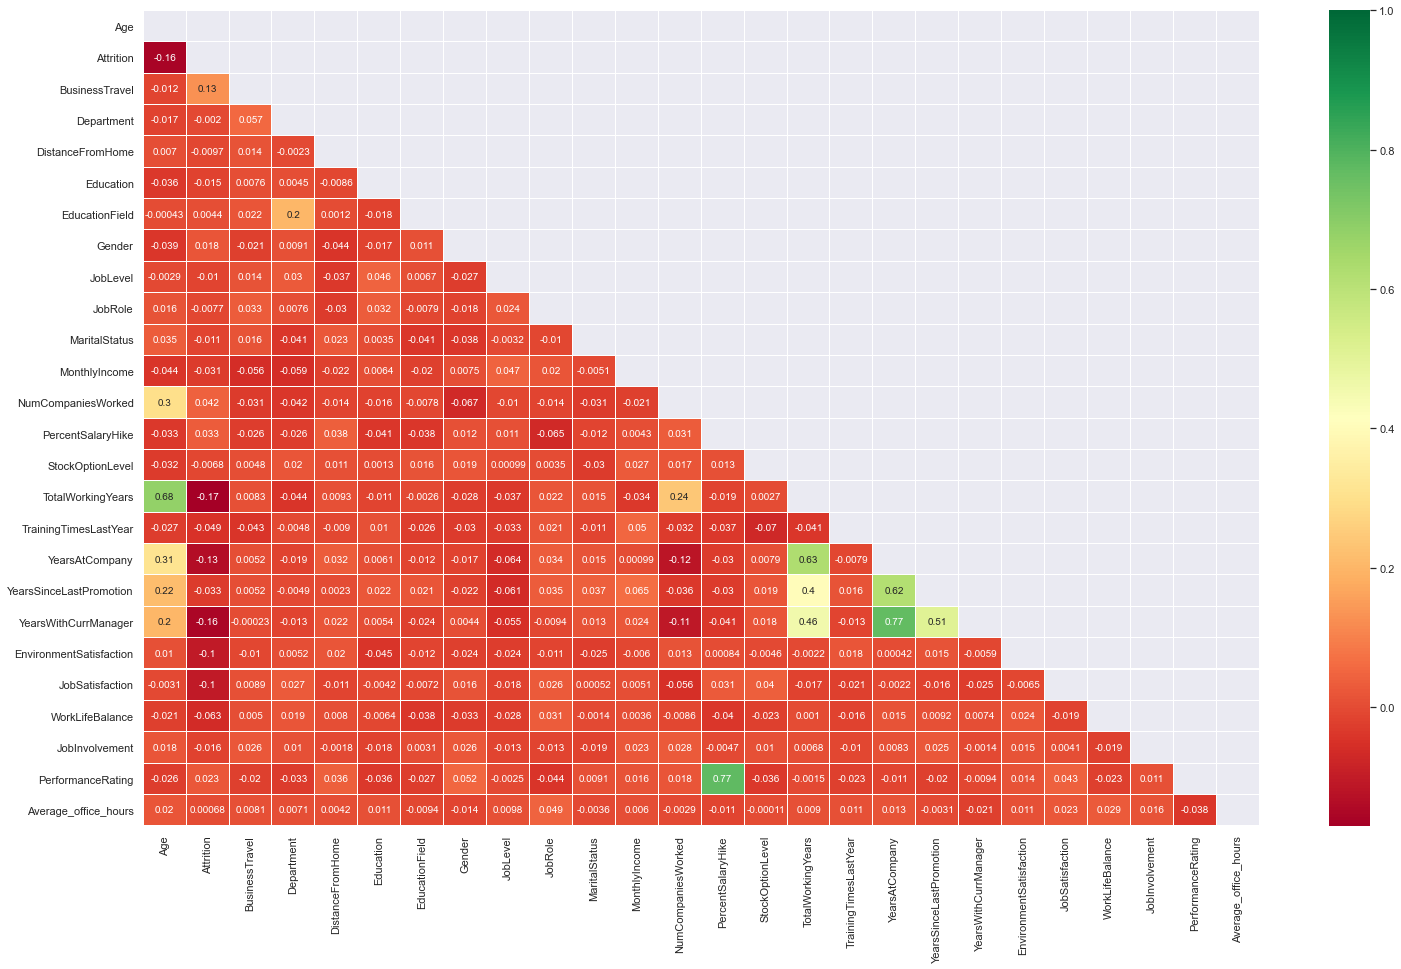

In [35]:
matrix = np.triu(employee_df.corr())
plt.figure(figsize = (25, 15))
sns.heatmap(employee_df.corr(), annot = True, linewidth = 0.02,cmap = 'RdYlGn', mask=matrix)
plt.show()

<a id='dist_several_features'></a>
### Data Viz 1 :: Distribution of Several Features
[Table of Contents](#TableOfContents)

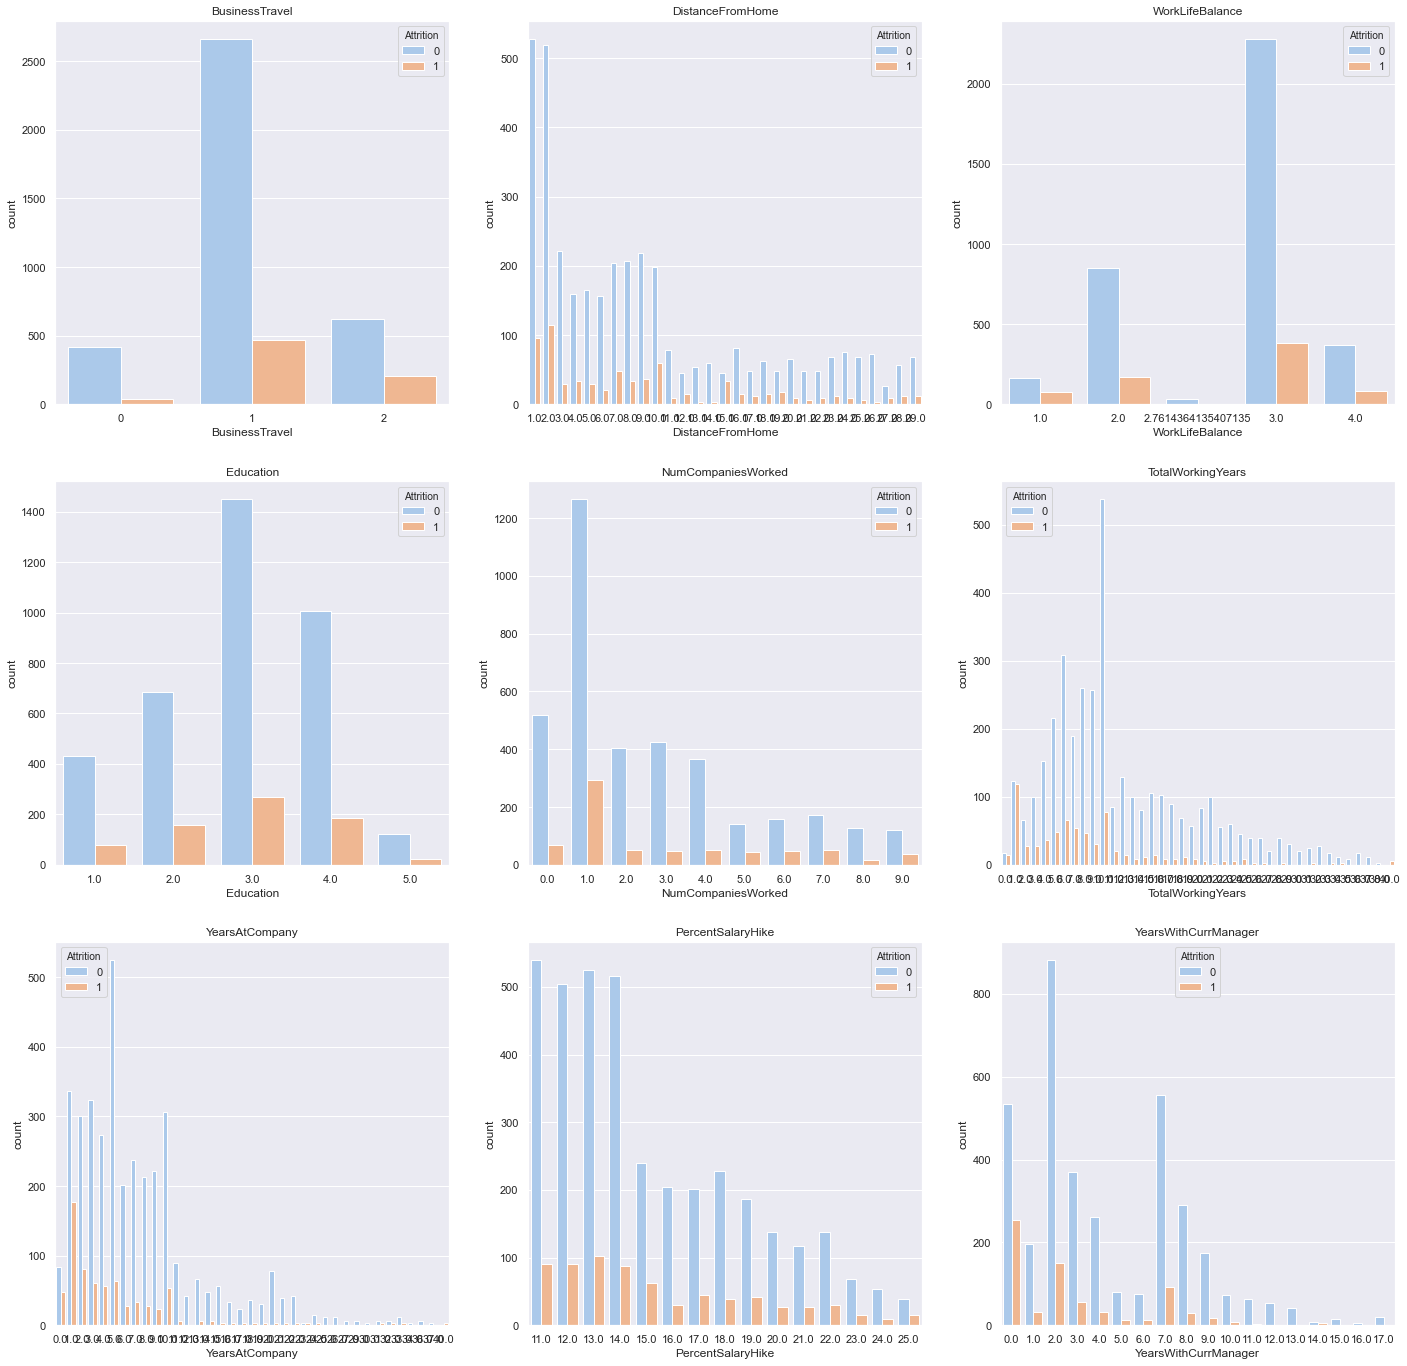

In [36]:
plt.figure(figsize=(24,24))

plt.subplot(3,3,1)
sns.countplot(x='BusinessTravel', hue='Attrition', data=employee_df, palette='pastel');
plt.title('BusinessTravel')

plt.subplot(3,3,2)
sns.countplot(x='DistanceFromHome', hue='Attrition', data=employee_df, palette='pastel');
plt.title('DistanceFromHome')

plt.subplot(3,3,3)
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=employee_df, palette='pastel');
plt.title('WorkLifeBalance')

plt.subplot(3,3,4)
sns.countplot(x='Education', hue='Attrition', data=employee_df, palette='pastel');
plt.title('Education')

plt.subplot(3,3,5)
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=employee_df, palette='pastel');
plt.title('NumCompaniesWorked')

plt.subplot(3,3,6)
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=employee_df, palette='pastel');
plt.title('TotalWorkingYears')

plt.subplot(3,3,7)
sns.countplot(x='YearsAtCompany', hue='Attrition', data=employee_df, palette='pastel');
plt.title('YearsAtCompany')

plt.subplot(3,3,8)
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=employee_df, palette='pastel');
plt.title('PercentSalaryHike')

plt.subplot(3,3,9)
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=employee_df, palette='pastel');
plt.title('YearsWithCurrManager')

plt.show()

<a id='train_test_split'></a>
### Train / Test Split of data
[Table of Contents](#TableOfContents)

In [37]:
# Split data into target data and predictors set

y_target = employee_df.Attrition
X_pred = employee_df.drop('Attrition', axis = 1)

In [38]:
# Split data into sets of train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pred, y_target, test_size=0.2, random_state=42)

In [39]:
# Scale data using StandardScaler

from sklearn.preprocessing import StandardScaler, QuantileTransformer

Scaler_S = StandardScaler()

X_train = Scaler_S.fit_transform(X_train)
X_test = Scaler_S.fit_transform(X_test)

<a id='Logistic_Regression_1'></a>
# Modelling
***
[Table of Contents](#TableOfContents)

## Logistic Regression (Manual Label Encoding)

In [40]:
# Import lib

from sklearn.linear_model import LogisticRegression

In [41]:
# Create the model:

logr_default = LogisticRegression()
logr_newton_cg = LogisticRegression(solver="newton-cg")
logr_elasticnet = LogisticRegression(solver="saga", penalty="elasticnet", l1_ratio=0.5)

In [42]:
# Fit the models:

LOGR_default = logr_default.fit(X_train,y_train)
LOGR_newton_cg = logr_newton_cg.fit(X_train,y_train)
LOGR_elasticnet = logr_elasticnet.fit(X_train,y_train)

In [43]:
# Predict using the models:

y_guess_default = LOGR_default.predict(X_test)
y_guess_newton_cg = LOGR_newton_cg.predict(X_test)
y_guess_elasticnet = LOGR_elasticnet.predict(X_test)

In [44]:
# Evaluating the models:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print('Accuracy score of Log. Regression Default:                  ', accuracy_score(y_test,y_guess_default),'\n')
print('Accuracy score of Log. Regression Newton-CG Solver:         ', accuracy_score(y_test,y_guess_newton_cg),'\n')
print('Accuracy score of Log. Regression ElasticNet / Saga Solver: ', accuracy_score(y_test,y_guess_elasticnet),'\n')


Accuracy score of Log. Regression Default:                   0.8435374149659864 

Accuracy score of Log. Regression Newton-CG Solver:          0.8435374149659864 

Accuracy score of Log. Regression ElasticNet / Saga Solver:  0.8435374149659864 



In [45]:
print("******************************************************")
print("**           DEFAULT LOGISTIC REGRESSION            **")
print("******************************************************\n")
print(classification_report(y_test,y_guess_default))

******************************************************
**           DEFAULT LOGISTIC REGRESSION            **
******************************************************

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       741
           1       0.58      0.08      0.14       141

    accuracy                           0.84       882
   macro avg       0.71      0.53      0.53       882
weighted avg       0.81      0.84      0.79       882



In [46]:
print("*******************************************************")
print("**      LOGISTIC REGRESSION (Newton-CG Solver)       **")
print("*******************************************************\n")
print(classification_report(y_test,y_guess_newton_cg))

*******************************************************
**      LOGISTIC REGRESSION (Newton-CG Solver)       **
*******************************************************

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       741
           1       0.58      0.08      0.14       141

    accuracy                           0.84       882
   macro avg       0.71      0.53      0.53       882
weighted avg       0.81      0.84      0.79       882



In [47]:
print("*****************************************************")
print("**        LOGISTIC REGRESSION (ElasticNet)         **")
print("*****************************************************\n")
print(classification_report(y_test,y_guess_elasticnet))

*****************************************************
**        LOGISTIC REGRESSION (ElasticNet)         **
*****************************************************

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       741
           1       0.58      0.08      0.14       141

    accuracy                           0.84       882
   macro avg       0.71      0.53      0.53       882
weighted avg       0.81      0.84      0.79       882



In [48]:
print("****************************************************")
print("**              CONFUSSION MATRIXES               **")
print("****************************************************\n")
print("Default:\n")
for i in confusion_matrix(y_test,y_guess_default):
    print(i)
print("\nNewton-CG Solver:\n")
for i in confusion_matrix(y_test,y_guess_newton_cg):
    print(i)
print("\nElasticNet:\n")
for i in confusion_matrix(y_test,y_guess_elasticnet):
    print(i)

****************************************************
**              CONFUSSION MATRIXES               **
****************************************************

Default:

[733   8]
[130  11]

Newton-CG Solver:

[733   8]
[130  11]

ElasticNet:

[733   8]
[130  11]


In [49]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_test, y_guess_default))
print("FI SCORE: ", f1_score(y_test, y_guess_default, average='weighted') )
print("jaccard_similarity_score: ", jaccard_similarity_score(y_test, y_guess_default))

LogisticRegression's Accuracy:  0.8435374149659864
FI SCORE:  0.789836314825182
jaccard_similarity_score:  0.8435374149659864


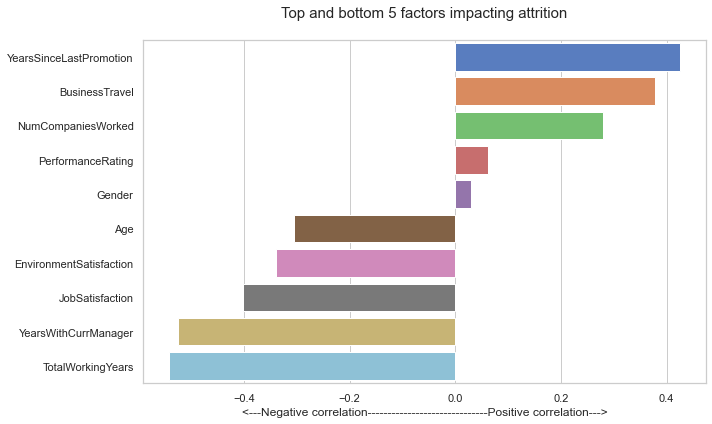

In [80]:
# Feature Importance Graph:

X_pred_labels = X_pred.columns

features_importance = pd.concat([pd.Series(X_pred_labels), pd.Series(LOGR_default.coef_[0])], axis=1)
features_importance.columns = ['Feature', 'Importance']
most_importnant_features = pd.concat([features_importance.nlargest(5, 'Importance'),
                                      features_importance.nsmallest(5, 'Importance').sort_values(by='Importance', ascending=False)])
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(y="Feature", x="Importance", data=most_importnant_features, palette= 'muted')
ax.set_title('Top and bottom 5 factors impacting attrition\n', fontsize=15)
ax.set(xlabel='<---Negative correlation------------------------------Positive correlation--->', ylabel='')
plt.tight_layout()

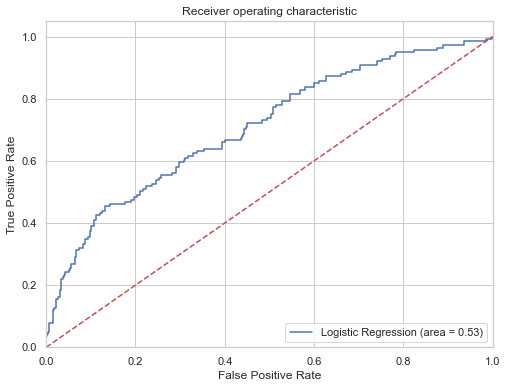

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, LOGR_default.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LOGR_default.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<a id='Logistic_Regression_2'></a>
## Logistic Regression (Dummy Vars)
[Table of Contents](#TableOfContents)

Some preprocessing is needed...

In [ ]:
employee_df = pd.concat([emp_data_df, survey_data_df, appraisal_data_df], axis=1)
employee_df.shape

In [ ]:
# Average office hours 
means_all_df = pd.DataFrame(round((time_diff.mean(axis = 1)/  np.timedelta64(60, 'm')),2))
means_all_df.columns = ['Average_office_hours']
employee_2_df = pd.concat([employee_df, means_all_df], axis=1)

employee_2_df = employee_2_df.drop(employee_2_df.index[0])

employee_df = employee_2_df.copy()

In [ ]:
employee_df.drop(list(employee_df.columns[employee_df.apply(lambda columns: columns.nunique())==1]) , axis=1, inplace=True)

In [ ]:
employee_df[['WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction']] = employee_df[['WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction']].fillna(employee_df[['WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction']].mean())
employee_df[['NumCompaniesWorked','TotalWorkingYears']] = employee_df[['NumCompaniesWorked','TotalWorkingYears']].fillna(employee_df[['NumCompaniesWorked','TotalWorkingYears']].median())

In [ ]:
employee_df['Average_office_hours'] = employee_df['Average_office_hours'].fillna(employee_df['Average_office_hours'].mean())

In [ ]:
y_target = employee_df.Attrition
y_target = np.where(y_target.values == 'Yes', 1, 0)

In [ ]:
X_pred = employee_df.drop('Attrition', axis = 1)

In [ ]:
# Split between categorical and numeric columns

columns = X_pred.columns
numeric_columns  = X_pred._get_numeric_data().columns
categorical_columns = list(set(columns) - set(numeric_columns))

In [ ]:
# Change categorical features to dummies and scale data. 
# I dont use LabelEncoder since it's better to keep different feature values in different cells
# otherwise the model could misunderstand data as 1 < 2 < 3 (Singe vs Married vs Divorced)

X_pred = pd.get_dummies(data = X_pred, columns = categorical_columns)
X_pred_labels = X_pred.columns

In [ ]:
# Transform numeric columns using log transformation

X_pred[numeric_columns] = (X_pred[numeric_columns] + 1).transform(np.log)

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X_pred, y_target, test_size=0.2, random_state=42)

In [ ]:
Scaler_S = StandardScaler()

X_train = Scaler_S.fit_transform(X_train)
X_test = Scaler_S.fit_transform(X_test)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
y_guess = clf.predict(X_test)

In [ ]:
print('Accuracy score of Logistic Regression', accuracy_score(y_test,y_guess), '\n')
print(classification_report(y_test,y_guess))
print(confusion_matrix(y_test,y_guess))

In [ ]:
features_importance = pd.concat([pd.Series(X_pred_labels), pd.Series(LOGR_default.coef_[0])], axis=1)
features_importance.columns = ['Feature', 'Importance']
most_importnant_features = pd.concat([features_importance.nlargest(5, 'Importance'),
                                      features_importance.nsmallest(5, 'Importance').sort_values(by='Importance', ascending=False)])
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(y="Feature", x="Importance", data=most_importnant_features, palette= 'muted')
ax.set_title('Top and bottom 5 factors impacting attrition\n', fontsize=15)
ax.set(xlabel='<---Negative correlation------------------------------Positive correlation--->', ylabel='')
plt.tight_layout()

<a id='Decision_Tree'></a>
## Decision Tree
[Table of Contents](#TableOfContents)

In [52]:
# Import Lib

from sklearn.tree import DecisionTreeClassifier

In [53]:
# Create and fit the models

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
# Predicting with the model

y_guess_DT = DT.predict(X_test)

In [73]:
# Scoring of the model:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_guess_DT))
print("FI SCORE: ", f1_score(y_test, y_guess_DT, average='weighted') )
print("jaccard_similarity_score: ", jaccard_similarity_score(y_test, y_guess_DT)) 

DecisionTrees's Accuracy:  0.9195011337868481
FI SCORE:  0.9133945060293134
jaccard_similarity_score:  0.9195011337868481


In [75]:
print("****************************************************")
print("**              CONFUSSION MATRIXES               **")
print("****************************************************\n")
print("Decision Tree:\n")
for i in confusion_matrix(y_test,y_guess_DT):
    print(i)

****************************************************
**              CONFUSSION MATRIXES               **
****************************************************

Decision Tree:

[727  14]
[57 84]


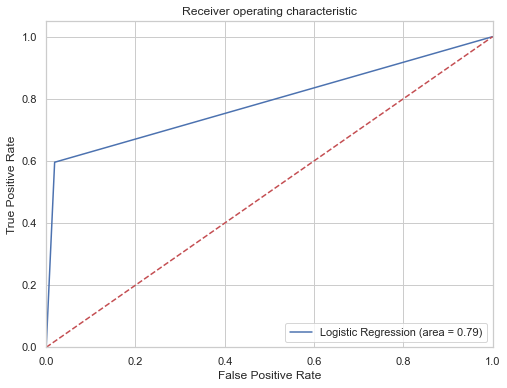

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_guess_DT)
fpr, tpr, thresholds = roc_curve(y_test, y_guess_DT)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

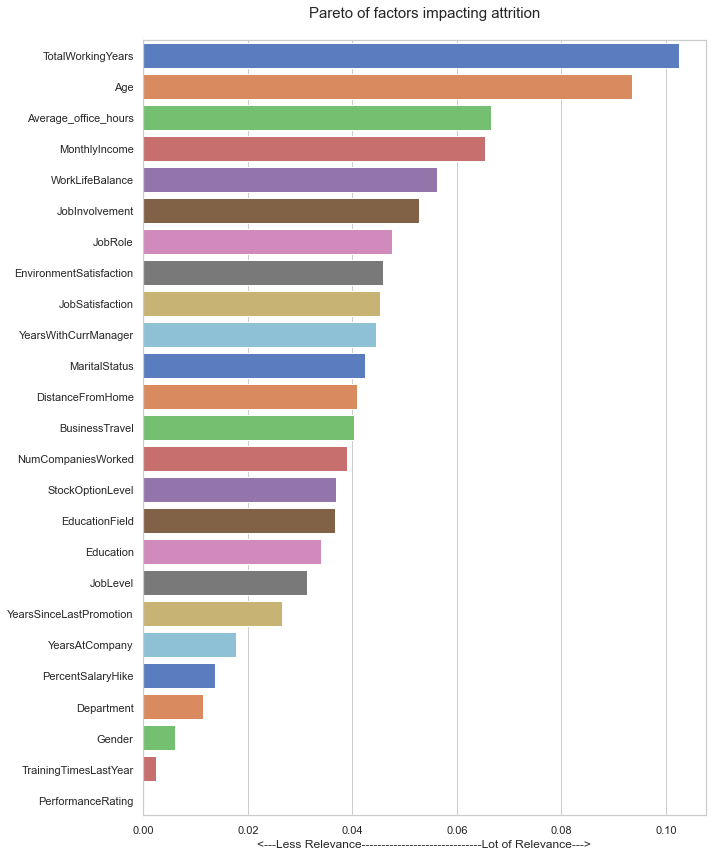

In [66]:
# Feature Importance Graph:

X_pred_labels = X_pred.columns

features_importance = pd.concat([pd.Series(X_pred_labels), pd.Series(DT.feature_importances_)], axis=1)
features_importance.columns = ['Feature', 'Importance']
most_importnant_features = pd.concat([features_importance.nlargest(30, 'Importance').sort_values(by='Importance', ascending=False)])
plt.figure(figsize=(10,12))
sns.set_style("whitegrid")
ax = sns.barplot(y="Feature", x="Importance", data=most_importnant_features, palette= 'muted')
ax.set_title('Pareto of factors impacting attrition\n', fontsize=15)
ax.set(xlabel='<---Less Relevance------------------------------Lot of Relevance--->', ylabel='')
plt.tight_layout()

<a id='Random_Forest'></a>
## Random Forest
[Table of Contents](#TableOfContents)

In [67]:
# Import Lib

from sklearn.ensemble import RandomForestClassifier

In [68]:
# Create and fit the models

RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
# Predicting with the model

y_guess_RF = RF.predict(X_test)

In [76]:
# Scoring of the model:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_guess_RF))
print("FI SCORE: ", f1_score(y_test, y_guess_RF, average='weighted') )
print("jaccard_similarity_score: ", jaccard_similarity_score(y_test, y_guess_RF)) 

DecisionTrees's Accuracy:  0.9852607709750567
FI SCORE:  0.9849687022053043
jaccard_similarity_score:  0.9852607709750567


In [78]:
print("****************************************************")
print("**              CONFUSSION MATRIXES               **")
print("****************************************************\n")
print("Decision Tree:\n")
for i in confusion_matrix(y_test,y_guess_RF):
    print(i)

****************************************************
**              CONFUSSION MATRIXES               **
****************************************************

Decision Tree:

[741   0]
[ 13 128]


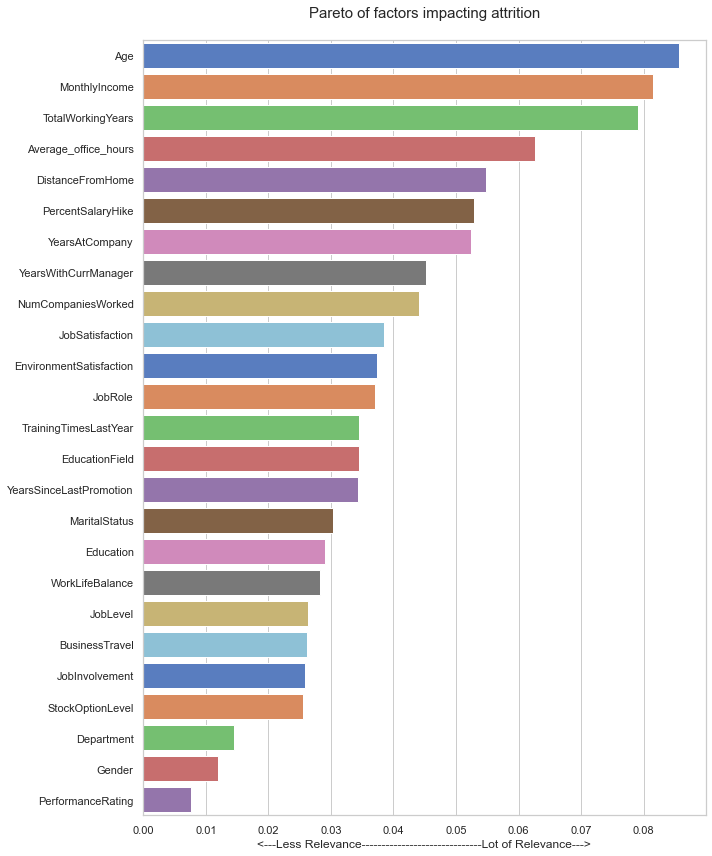

In [79]:
# Feature Importance Graph:

X_pred_labels = X_pred.columns

features_importance = pd.concat([pd.Series(X_pred_labels), pd.Series(RF.feature_importances_)], axis=1)
features_importance.columns = ['Feature', 'Importance']
most_importnant_features = pd.concat([features_importance.nlargest(30, 'Importance').sort_values(by='Importance', ascending=False)])
plt.figure(figsize=(10,12))
sns.set_style("whitegrid")
ax = sns.barplot(y="Feature", x="Importance", data=most_importnant_features, palette= 'muted')
ax.set_title('Pareto of factors impacting attrition\n', fontsize=15)
ax.set(xlabel='<---Less Relevance------------------------------Lot of Relevance--->', ylabel='')
plt.tight_layout()

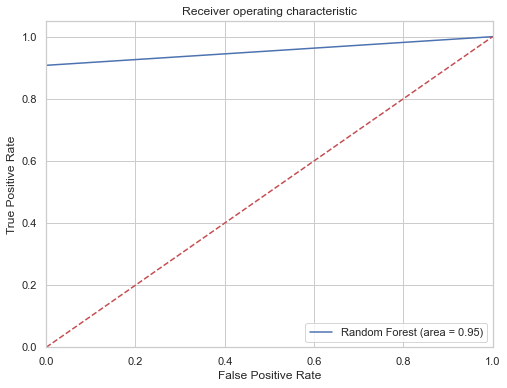

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_guess_RF)
fpr, tpr, thresholds = roc_curve(y_test, y_guess_RF)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()